In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation,Dense, Embedding, GRU
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('C:\\Users\\21341038\\Downloads\\SarcasDetection.csv' )


In [3]:
df.head(10)

,Unnamed: 0,Comments,Label
0,0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0
1,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0
2,2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0
3,3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0
4,4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0
5,5,"আজ আমাকে খোদাই করার জন্য ধন্যবাদ, যথাযথ ভাল বন...",1.0
6,6,আমি এমন পরিকল্পনাগুলি পছন্দ করি যা কখনই ঘটে না...,1.0
7,7,"আমি যখন কাউকে দীর্ঘশ্বাস শুনি, ‘জীবন কঠিন,’ আম...",1.0
8,8,"আমি বলছি না আমি আপনাকে ঘৃণা করি, আমি যা বলছি ত...",1.0
9,9,"আমি এখনই ব্যস্ত, আমি কি আপনাকে অন্য কোনও সময় ...",1.0


<Axes: xlabel='Label', ylabel='count'>

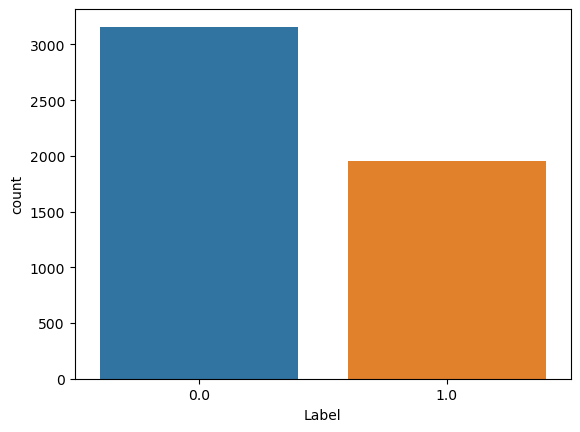

In [4]:
import seaborn as sns
sns.countplot(x='Label', data=df)

In [5]:
X = list(df['Comments'])

In [6]:
y = df['Label']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [8]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)


In [9]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

12519

In [10]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [11]:
from numpy import asarray
from numpy import zeros

In [12]:
embeddings_index = {}
with open('C:\\Users\\21341038\\Downloads\\bn_glove.39M.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


In [13]:
embedding_matrix = zeros((vocab_length, 300))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [14]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.242119   -0.197923    0.066564   ...  0.113951   -0.074198
   0.77122903]
 [ 0.096394    0.38893801  0.35681501 ... -0.02118    -0.21176399
  -0.42254901]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.058507   -0.26494199  0.096581   ... -0.030044    0.167257
   0.063862  ]
 [-0.18411601 -0.194653    0.122052   ... -0.116897   -0.389382
   0.27348301]]


In [15]:
#BI GRU

In [16]:
model_bigru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, 300, input_length=maxlen, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          3755700   
                                                                 
 bidirectional (Bidirection  (None, 100, 512)          857088    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               1182720   
 onal)                                                           
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5861301 (22.36 MB)
Trainable params: 21056

In [17]:
history_bigru = model_bigru.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)

Epoch 1/15
65/65 [==============================] - 103s 1s/step - loss: 0.2948 - accuracy: 0.8739 - val_loss: 0.1962 - val_accuracy: 0.9152
Epoch 2/15
65/65 [==============================] - 131s 2s/step - loss: 0.1684 - accuracy: 0.9367 - val_loss: 0.1954 - val_accuracy: 0.9239
Epoch 3/15
65/65 [==============================] - 157s 2s/step - loss: 0.1121 - accuracy: 0.9568 - val_loss: 0.1721 - val_accuracy: 0.9370
Epoch 4/15
65/65 [==============================] - 160s 2s/step - loss: 0.0942 - accuracy: 0.9630 - val_loss: 0.1723 - val_accuracy: 0.9435
Epoch 5/15
65/65 [==============================] - 162s 2s/step - loss: 0.0559 - accuracy: 0.9819 - val_loss: 0.1763 - val_accuracy: 0.9326
Epoch 6/15
65/65 [==============================] - 164s 3s/step - loss: 0.0348 - accuracy: 0.9862 - val_loss: 0.2197 - val_accuracy: 0.9348
Epoch 7/15
65/65 [==============================] - 156s 2s/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.2499 - val_accuracy: 0.9348
Epoch 8/15
65

In [18]:
score = model_bigru.evaluate(X_test, y_test, verbose=1)

16/16 [==============================] - 5s 284ms/step - loss: 0.4477 - accuracy: 0.9414


In [19]:
import matplotlib.pyplot as plt

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_pred_proba = model_bigru.predict(X_test)
y_pred = np.round(y_pred_proba)


16/16 [==============================] - 5s 253ms/step


In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score


precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Macro-averaged Precision: ", precision_macro)
print("Macro-averaged Recall: ", recall_macro)
print("Macro-averaged F1-score: ", f1_macro)


Macro-averaged Precision:  0.9383547662788324
Macro-averaged Recall:  0.9408467162505725
Macro-averaged F1-score:  0.9395380327817229


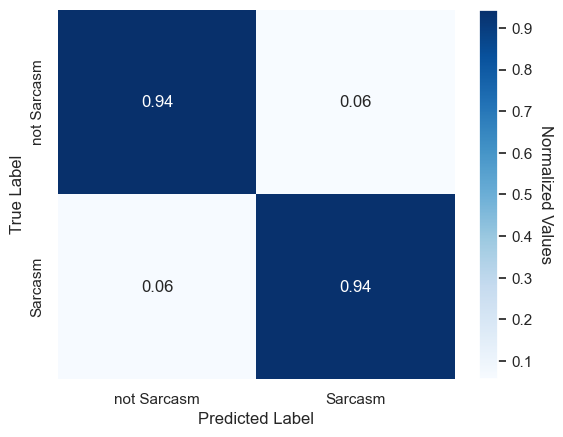

[[286  17]
 [ 13 196]]


In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels):
    sns.set()
    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", cbar=False)

    # Set tick labels to string labels
    tick_labels = np.arange(len(labels))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xticks(tick_labels + 0.5)
    ax.set_yticks(tick_labels + 0.5)

    # Add colorbar
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.ax.set_ylabel('Normalized Values', rotation=270, labelpad=15)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = ['not Sarcasm', 'Sarcasm']
plot_confusion_matrix(cm_norm, labels)
print(cm)